### 회귀 모델
- 선형회귀모델
- 다항회귀
- 규제선형회귀
  - L1 규제
  - L2 규제
  - Elastic Net
- 기타 분류, 회귀가 모두 가능한 머신러닝 모델 : 의사결정나무, 랜덤포레스트, Gradient Boosting, SVM

## 회귀모델 평가 지표

- R² (결정계수) : 변동을 기반으로 예측성능을 평가하는 지표
  - 실제 분산 대비 예측 분산의 비율
  - 총변동 = 회귀변동 + 오차변동
  - R² = 회귀변동 / 총변동
  - 0 ~ 1 : 1로 갈수록 좋은 모델

- MSE (Mean Squared Error) : 실제값과 예측값의 차이를 제곱하여 평균을 계산
- RMSE (Root Mean Squared Error) 
- MAE (Mean Absolute Error) : 실제값과 예측값의 차이의 절대값의 평균을 계산
  - 위 세 가지 지표는 0으로 가면 갈수록 좋은 모델(상한선 X)

- 평가지표를 확인한다 -> 여러 알고리즘을 이용해 여러 개의 모델을 도출하여 가장 좋은 모델을 선택하기 위해 확인

In [2]:
import pandas as pd
import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
import plotly.express as px # 위의 두 시각화 라이브러리말고, plotly 사용해보기

# 인슐린 수치를 예측하는 회귀모델

### 선형회귀모델
- 경사하강법 + 최소제곱법
- Y = aX + b에서 a와 b를 구하는 수식화 작업(Modeling)

In [3]:
df1 = pd.read_csv('diabetes.csv')
print(df1.shape)
print(df1.info())
display(df1.head())
display(df1.tail())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
# Insulin 수치를 예측하는 선형회귀모델 만들기
Y = df1.Insulin
X = df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction','Age']]

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1234)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
## 선형회귀모델 정의 및 학습
model = LinearRegression()

In [9]:
# 평가
from sklearn.metrics import r2_score, mean_squared_error

In [10]:
model.fit(X_train, Y_train)

LinearRegression()

In [11]:
# 평가하는 함수를 만들면, 추후 다른 모델에도 바로 적용 가능!
def eval_regression(model):
    Y_train_pred = model.predict(X_train)
    Y_test_pred = model.predict(X_test)
    print('학습 능력')
    print('R Square : ', r2_score(Y_train, Y_train_pred))
    print('MSE : ', mean_squared_error(Y_train, Y_train_pred))
    print('일반화 능력')
    print('R Square : ', r2_score(Y_test, Y_test_pred))
    print('MSE : ', mean_squared_error(Y_test, Y_test_pred))

In [12]:
## model 평가
eval_regression(model)

학습 능력
R Square :  0.30917770403082057
MSE :  9587.307679902766
일반화 능력
R Square :  0.23506481968175896
MSE :  8685.581815349737


### 다항회귀분석 (Polynominal Regression)

- 기존 선형회귀 분석 : Y와 X간 관계를 일차방정식 형태로 풀이
- 다항회귀분석 : 다차원의 X을 가져와 2차 또는 3차 이상의 방정식으로 표현
- 성능을 (극단적으로) 높이기 위함
- 회귀계수를 찾는 것이 큰 의미가 없음 / 3차식을 넘어가면 해석하기도 어려움

In [13]:
from sklearn.preprocessing import PolynomialFeatures
# 기존의 X값을 다항식으로 변환

In [14]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

=> 칼럼의 개수 : 7개(X1부터 X7까지 있다고 생각)

In [15]:
## 다항회귀분석 실행
poly=PolynomialFeatures(degree=2)

In [16]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age
8,2,197,70,45,30.5,0.158,53
719,5,97,76,27,35.6,0.378,52
296,2,146,70,38,28.0,0.337,29
651,1,117,60,23,33.8,0.466,27
93,4,134,72,0,23.8,0.277,60
...,...,...,...,...,...,...,...
372,0,84,64,22,35.8,0.545,21
204,6,103,72,32,37.7,0.324,55
53,8,176,90,34,33.7,0.467,58
294,0,161,50,0,21.9,0.254,65


In [17]:
X_train_poly=poly.fit_transform(X_train)
X_train_poly.shape

(576, 36)

=> 7개로 만들 수 있는 조합 : 
- 상수항 1개 
- 기존의 X1, .., X7 7개
- X1^2, ..., X7^2 7개
- 교차항 7C2 : 21개
- 따라서 1+7+7+21 = 36개

In [18]:
model_poly=LinearRegression()

In [19]:
model_poly.fit(X_train_poly, Y_train)

LinearRegression()

In [20]:
X_test_poly=poly.transform(X_test)

In [21]:
def eval_regression_poly(model):
    Y_train_pred = model.predict(X_train_poly)
    Y_test_pred = model.predict(X_test_poly)
    print('학습 능력')
    print('R Square : ', r2_score(Y_train, Y_train_pred))
    print('MSE : ', mean_squared_error(Y_train, Y_train_pred))
    print('일반화 능력')
    print('R Square : ', r2_score(Y_test, Y_test_pred))
    print('MSE : ', mean_squared_error(Y_test, Y_test_pred))

In [22]:
eval_regression_poly(model_poly)

학습 능력
R Square :  0.11688465614923238
MSE :  12255.971713336496
일반화 능력
R Square :  -0.8016488497313579
MSE :  20457.117007433437


In [23]:
# 파이프 라인을 활용하여 다항 회귀 분석 수행
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
])

In [24]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('poly', PolynomialFeatures()),
                ('lin_reg', LinearRegression())])

In [25]:
coef = pipeline.named_steps['lin_reg'].coef_

df_coef = pd.DataFrame()
df_coef['Coef'] = coef
df_coef['Feature'] = poly.get_feature_names_out(X.columns)

df_coef

,Coef,Feature
0,1.273858e+12,1
1,-1.383929e+00,Pregnancies
2,6.965555e-01,Glucose
3,2.942430e+00,BloodPressure
4,-3.827437e+00,SkinThickness
5,-5.515448e-01,BMI
6,2.260391e+02,DiabetesPedigreeFunction
7,-3.244646e+00,Age
8,1.543107e-01,Pregnancies^2
9,-2.976766e-01,Pregnancies Glucose


In [26]:
# 다항회귀모델 평가
eval_regression(pipeline)

학습 능력
R Square :  0.11688465614923238
MSE :  12255.971713336496
일반화 능력
R Square :  -0.8016488497313579
MSE :  20457.117007433437


=> 모델이 데이터를 잘 학습하지 못했거나, 부적절한 모델 선택 등의 이유로 R² 값이 음수가 나온 것

### Bias - Variance Trade off
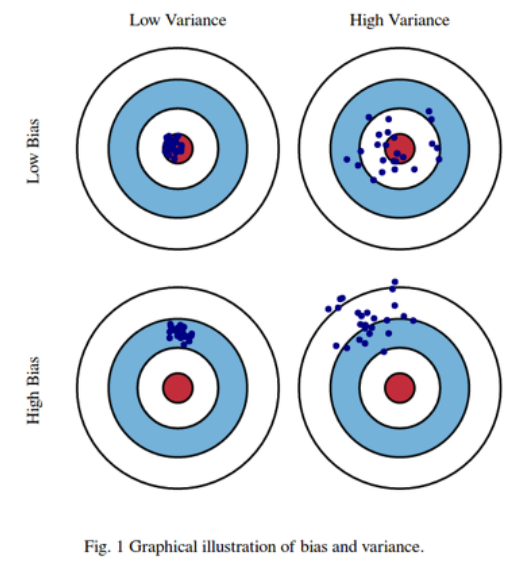
- 다항회귀 (Degree = 2 이상) 또는 X가 매우 많은 경우, Train Set에 학습이 집중되어 Test에서는 성능이 떨어지는 (Overfitting) 현상이 자주 발생 -> High Variance / Low Bias
- 최적화 함수에 패널티 항을 추가하여, Bias와 Variance의 균형을 맞추어 모델의 일반화 성능을 향상 (**규제선형회귀모델**)

## 규제 선형 회귀 모델
- X 변수의 개수에 따라 (Degree에 따라서) Bias와 Variance의 적절한 값을 찾는 것이 중요
- Cost Function을 최소화 하면서, 회귀계수 값의 크기를 제어
- Cost Function에 패널티 항을 추가하여 Variance값이 커지지 않게 통제
  - L1 규제 : 패널티 항을 절댓값으로 계산하여 부여
  - L2 규제 : 패널티 항을 제곱으로 계산하여 부여

- **Lasso Model**
- 선형회귀에 L1규제를 추가한 모델
- L1 규제는 예측 영향력이 작은 Feature의 회귀계수를 0으로 만들어서, 회귀 예측시 X가 선택되지 않게끔 규제(L1 규제 회귀를 변수 선택법이라고 부름)
- Cost Function에 절댓값의 합(Sum of Absolute Values)을 최소화 하도록 패널티를 적용
- Alpha은 규제 강도를 조절하는 매개변수 (HyperParameter)
  - 높은 Alpha값은 모델의 회귀계수를 더 많이 축소시키고, 일부 회귀계수를 0으로 만들어, 특정 변수들을 선택하게끔 하는 효과 
    - (모델이 더 간단해짐 / 성능이 낮아질 위험이 증가 / 편향이 높아지고 분산이 낮아짐)
  - 낮은 Alpha값은 규제의 효과를 줄이고 모델이 더 많은 데이터를 맞출 수 있게 학습 
    - (모델이 더 복잡해짐 / 과적합의 위험이 증가 / 편향은 낮아지고 분산이 높아짐)

In [1]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [27]:
## 파이프라인으로 규제선형회귀 분석
model_pipe1=Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])

In [28]:
hyperparam = {'lasso__alpha' : (0.5, 1, 1.5)}
grid_model = GridSearchCV(model_pipe1, param_grid = hyperparam, cv=3, 
                          scoring='r2', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model = grid_model.best_estimator_
best_model

Pipeline(steps=[('scaler', StandardScaler()), ('lasso', Lasso(alpha=1.5))])

In [29]:
# 모델 평가
eval_regression(best_model)


학습 능력
R Square :  0.3079122888842636
MSE :  9604.869250256876
일반화 능력
R Square :  0.23882845530948527
MSE :  8642.846998062103


In [32]:
#회귀계수 확인
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model['lasso'].coef_
df_coef['X'] = X.columns

df_coef

,Coef,X
0,-7.594061,Pregnancies
1,38.074963,Glucose
2,-1.127692,BloodPressure
3,50.229477,SkinThickness
4,-4.369074,BMI
5,1.580423,DiabetesPedigreeFunction
6,-0.000000,Age


In [33]:
px.bar(df_coef, x='X', y='Coef')

Lasso로 성능이 보장된 상황에서 변수를 선택한 뒤, 다른 모델링 기법을 적용하는 경우가 많다! (불필요한 변수를 제거하는 용으로 사용)

- **Ridge**

- 선형회귀에 L2규제를 추가한 회귀 모델, L2규제는 상대적으로 큰 회귀계수를 더 작게 만들어 편향을 줄이는 규제 모델
- Alpha (람다)
  - 높은 Alpha 값은 모델의 회귀 계수를 더 많이 축소시켜 모델의 복잡성을 줄임
    - (단순화 / 과적합 방지 / 성능이 떨어질 위험)
  - 낮은 Alpha 값은 모델의 회귀 계수를 적게 축소시켜 모델의 복잡성을 유지
    - (복잡한 / 과적합 위험성 / 성능은 좋은 모델)

In [34]:
from sklearn.linear_model import Ridge

In [35]:
## 파이프라인으로 규제선형회귀 분석 - L2규제
model_pipe2 = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

In [36]:
hyperparam = {'ridge__alpha' : (0.1, 1, 1.5)}
grid_model = GridSearchCV(model_pipe2, param_grid = hyperparam, cv=3, 
                          scoring='r2', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model2 = grid_model.best_estimator_
best_model2

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge(alpha=1.5))])

In [37]:
# 모델 평가
eval_regression(best_model2)

학습 능력
R Square :  0.3091746682223281
MSE :  9587.349811186374
일반화 능력
R Square :  0.2358485201407693
MSE :  8676.68316010338


In [38]:
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model2['ridge'].coef_
df_coef['X'] = X.columns
df_coef

,Coef,X
0,-8.853695,Pregnancies
1,40.326757,Glucose
2,-2.557691,BloodPressure
3,52.504317,SkinThickness
4,-7.011187,BMI
5,2.768926,DiabetesPedigreeFunction
6,-0.298434,Age


In [39]:
px.bar(df_coef, x='X', y='Coef')

- **Elastic Net**
- L1 규제와 L2규제를 함께 결합한 모델
- X가 매우 많은 데이터에 대해 적용 / X 값들이 모두 의미를 갖는 경우 

In [40]:
from sklearn.linear_model import ElasticNet

In [43]:
## 파이프라인으로 규제선형회귀 분석 - Elastic net
model_pipe3 = Pipeline([
    ('scaler', StandardScaler()),
    ('elastic', ElasticNet())
])

In [46]:
hyperparam = {'elastic__alpha' : (0.1, 1, 1.5)}
grid_model = GridSearchCV(model_pipe3, param_grid = hyperparam, cv=3, 
                          scoring='r2', n_jobs=-1)
grid_model.fit(X_train, Y_train)
best_model3 = grid_model.best_estimator_
best_model3

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=0.1))])

In [47]:
# 모델 평가
eval_regression(best_model3)

학습 능력
R Square :  0.30815541182117157
MSE :  9601.495163442107
일반화 능력
R Square :  0.2475954193488734
MSE :  8543.301068687206


In [55]:
df_coef = pd.DataFrame()
df_coef['Coef'] = best_model3['elastic'].coef_
df_coef['X'] = X.columns
df_coef

,Coef,X
0,-8.269693,Pregnancies
1,38.027769,Glucose
2,-1.895798,BloodPressure
3,49.285502,SkinThickness
4,-5.125977,BMI
5,3.182279,DiabetesPedigreeFunction
6,-0.573266,Age


In [57]:
px.bar(df_coef, x='X', y='Coef')

### 과제 3-1
- 타이타닉 생존자 예측하기
- 수업 때 배운 내용을 최대한 활용해야 함
- 노션 : Titanic-dataset.csv

### 과제 3-2
- 따릉이 대여량 예측하기
- 수업 때 배운 내용을 최대한 활용해야 함
- 노션 : SeoulBikeData_NaN.csv